
Total samples in input: 119
Samples passing filter (Above_50000 reads and Val score > 0.75): 73
Fraction passing: 73/119 = 61.34%



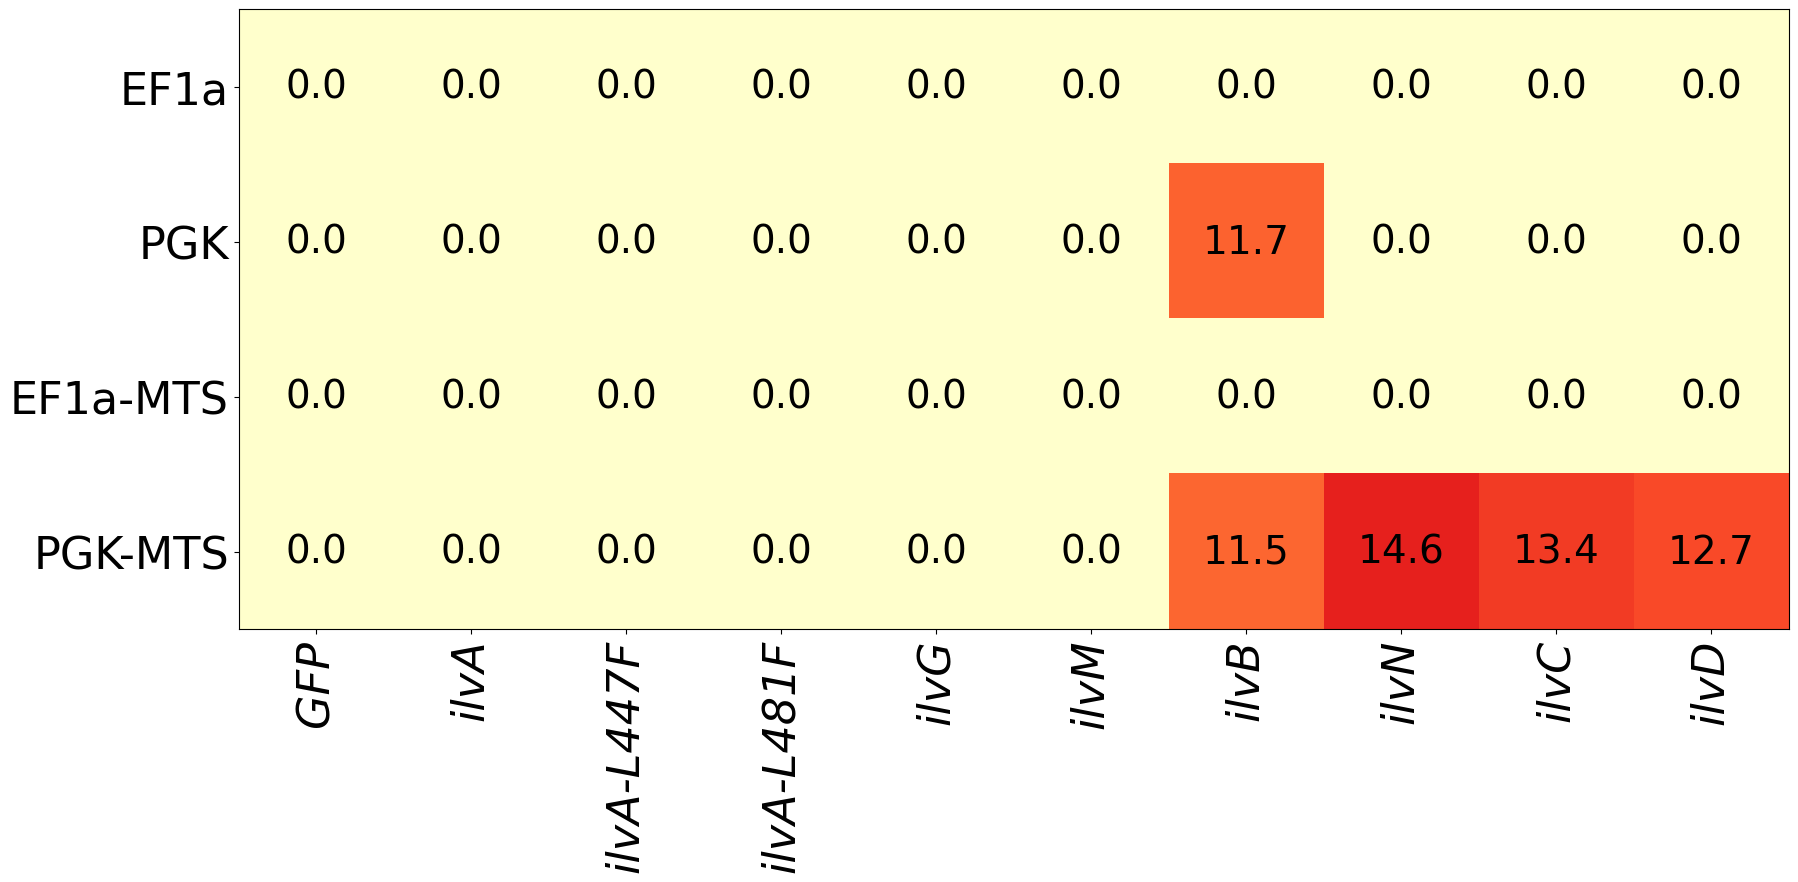

Filtered heatmap saved as: /Users/trollj01/PycharmProjects/pythonProject1/20250527_SGE_FinalScripts/Jurkat_Valine/Jurkat_Valine_Heatmaps/Jurkat_Val_consolidated_median_heatmap_strongvalineprototrophy.svg


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import os

# Load the CSV
file_path = '/Users/trollj01/PycharmProjects/pythonProject1/20250527_SGE_FinalScripts/Jurkat_Valine/Jurkat_Valine_SummaryOutputs/Jurkat_Val_RelativeReadCounts_InclValScore.csv'
data = pd.read_csv(file_path)

# 🚨 Apply both filters
filtered_data = data[(data['Read_Quality'] == 'Above_50000') & (data['Val score'] > 0.75)]

# After filtering
num_total_samples = data.shape[0]
num_filtered_samples = filtered_data.shape[0]

print(f"\nTotal samples in input: {num_total_samples}")
print(f"Samples passing filter (Above_50000 reads and Val score > 0.75): {num_filtered_samples}")
print(f"Fraction passing: {num_filtered_samples}/{num_total_samples} = {num_filtered_samples/num_total_samples:.2%}\n")

# Select the feature columns (ignore File, Read_Quality, and Val score)
feature_columns = data.columns[2:-1]  # Skip 'File' and 'Read_Quality' and exclude 'Val score'

# Recalculate the medians
filtered_feature_medians = filtered_data[feature_columns].median(axis=0)

# Prepare the DataFrame for pivoting
filtered_feature_medians_df = filtered_feature_medians.reset_index()
filtered_feature_medians_df.columns = ['Feature', 'Median']

# Split the feature name into Promoter and Gene
filtered_feature_medians_df[['Promoter', 'Gene']] = filtered_feature_medians_df['Feature'].str.split('_', expand=True)

# Create the pivot table
filtered_heatmap_data = filtered_feature_medians_df.pivot(index='Promoter', columns='Gene', values='Median')

# Rename columns for better gene names
filtered_heatmap_data = filtered_heatmap_data.rename(columns={
    'ilvA mut 1': 'ilvA-L447F',
    'ilvA mut 2': 'ilvA-L481F'
})

# Reorder promoters and genes
promoter_order = ['Ef1a', 'PGK', 'Ef1a-MTS', 'PGK-MTS']
gene_order_updated = ['GFP', 'ilvA', 'ilvA-L447F', 'ilvA-L481F', 'ilvG', 'ilvM', 'ilvB', 'ilvN', 'ilvC', 'ilvD']
filtered_heatmap_data = filtered_heatmap_data.loc[promoter_order, gene_order_updated]

# Plot the heatmap
plt.figure(figsize=(20, 10))
plt.imshow(filtered_heatmap_data, cmap=plt.cm.YlOrRd, interpolation='nearest', vmin=0, vmax=20)

# Add text annotations
for i in range(filtered_heatmap_data.shape[0]):
    for j in range(filtered_heatmap_data.shape[1]):
        plt.text(j, i, f"{filtered_heatmap_data.iloc[i, j]:.1f}", ha='center', va='center', color='black', fontsize=28)

# Set tick labels
plt.xticks(np.arange(len(gene_order_updated)), gene_order_updated, rotation=90, fontsize=32, fontstyle='italic')
plt.yticks(np.arange(len(promoter_order)), ['EF1a', 'PGK', 'EF1a-MTS', 'PGK-MTS'], fontsize=32)

# Save output
output_path = "/Users/trollj01/PycharmProjects/pythonProject1/20250527_SGE_FinalScripts/Jurkat_Valine/Jurkat_Valine_Heatmaps/Jurkat_Val_consolidated_median_heatmap_strongvalineprototrophy.svg"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path, format='svg', dpi=300, bbox_inches='tight')

# Show the heatmap
plt.show()

print(f"Filtered heatmap saved as: {output_path}")
